# Project: Wrangling and Analyze Data

In [3]:
# importing the needed libraries

import pandas as pd
import numpy as np
import json


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
df_Dogs = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# importing the requests library
import requests

# Gathering the dataset using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving tsv file
with open ("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

#Read tsv file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#importing the tweepy library
import tweepy

tweets = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assessing Data

In this section, the gathered dataset will be assessed via two main methods; visual and programmatic assessment. These form of assessments will enable us identify the quality and tidiness issues associated with the dataset.

The following has to be noted;

- Only original ratings that have images are needed.
- 8 quality issues and 2 tidiness issues will be discussed

In [7]:
pd.set_option('display.max_column', None)

pd.set_option('display.max_colwidth', None)

In [8]:
df_Dogs.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
df_Dogs.text.head(10)

0                                                             This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1        This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                         This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                   This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4        This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5        Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #B

In [10]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
df_tweetscount = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])

df_tweetscount

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [12]:
df_Dogs.name.value_counts().head(40)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Phil         5
Sammy        5
Gus          5
Chester      5
Alfie        5
Sunny        5
Bentley      5
very         5
Oakley       5
Finn         5
Name: name, dtype: int64

In [13]:
list(df_Dogs)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [14]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [15]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [16]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [17]:
df_Dogs.name.value_counts().tail(20)

Zoe           1
Gilbert       1
Rose          1
Theo          1
Fido          1
Emma          1
Spencer       1
Lilli         1
Boston        1
Brandonald    1
Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

In [18]:
list(df_image)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [19]:
list(df_tweetscount)

['id', 'retweet_count', 'favorite_count']

In [20]:
df_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_tweetscount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
df_Dogs.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [24]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [25]:
df_tweetscount.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [26]:
df_Dogs['rating_numerator'].value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [27]:
df_Dogs[df_Dogs.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Azuka Ume\AppData\Local\Temp\ipykernel_25220\1539768562.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Dogs[df_Dogs.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [28]:
df_Dogs.loc[45,:].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [29]:
df_Dogs.loc[340,:].text

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [30]:
df_Dogs['rating_denominator'].value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
df_Dogs['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [32]:
df_Dogs['expanded_urls'].nunique()

2218

### Quality issues

#### df_Dogs Table

1.timestamp datatype is object instaed of datetime datetype

2.rating_numerator is integer datatype instead of float.

3.Improper extratction of rating_numerator. 6 rows with incorrect rating numerator

4.Presence of rows with retweeted_status_id as non null (indicative of retweets) - 181 identified

5.78 rows associated with reply tweets as seen in (in_reply_to_status_id, in_reply_to_user_id)

6.Multiple values for rating_denominator

7.Expanded_url column contain missing tweets

8.Name column containing rows that are not valid (rows having names such as an, a, the) and names starting with lower cases that are most likely not names of Dogs


#### df_image_pred table
1.Missing data. Dataset containing 2075 image predictions which is 281 less than the number of tweets in the df_Dogs table. 

#### df_tweetscount table

1.tweet id column name does not correlate with the tweet_id name on the Dogs_Rating Table 

### Tidiness issues
1.Empty columns after removing rows associated with retwwets and replies (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)

2.Dogs_Rating Table - Multiple column for Dog stages (dogo, fluffer, pupper and puppo)

3.Information spread across three tables. One table needed to into one to give one final dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data

df_Dogs_clean = df_Dogs.copy()

df_image_clean = df_image.copy()

df_tweetscount_clean = df_tweetscount.copy()


### Quality Issue #1: df_Dogs Table - Timestamp is in the wrong datatype (object)

#### Define: Convert timestamp to the correct datatype (datetime)

#### Code

In [34]:
df_Dogs_clean['timestamp'] = pd.to_datetime(df_Dogs_clean['timestamp'])

#### Test

In [35]:
df_Dogs_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Qaulity Issue #2: rating_numerator is integer datatype instead of float

#### Define: Convert rating_numerator to float datatype

#### Code

In [36]:
df_Dogs_clean['rating_numerator'] = df_Dogs_clean.rating_numerator.astype(float)

#### Test

In [37]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Quality Issue #3: Improper extratction of rating_numerator. 6 rows with incorrect rating numerator

#### Define: Extract rating_numerator accurately

#### Code

In [38]:
df_Dogs_clean['rating_numerator'] = df_Dogs_clean.text.str.extract('(\d+\.?\d*)', expand = True)

#### Test

In [39]:
df_Dogs_clean[df_Dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Azuka Ume\AppData\Local\Temp\ipykernel_25220\3280258299.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Dogs_clean[df_Dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [40]:
print(df_Dogs_clean.loc[45,:].text)

df_Dogs_clean.loc[45,:].rating_numerator

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948


'13.5'

In [41]:
print(df_Dogs_clean.loc[1712,:].text)

df_Dogs_clean.loc[1712,:].rating_numerator

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


'11.26'

### Quality Issue #4: df_Dogs Table - Presence of retweets (as seen in rows retweeted_status_id with non null values). 181 rows identified

#### Define: Filter retweeted_status_id to drop rows with retweeted_status_id as non null

#### Code

In [42]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.retweeted_status_id.isnull() == True]

#### Test

In [43]:
print(df_Dogs_clean.retweeted_status_id.nunique())

print(df_Dogs_clean.shape)

df_Dogs_clean.sample(10)

0
(2175, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1691,681320187870711809,NaN,NaN,2015-12-28 03:46:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Glacier. He's a very happy pup. Loves to sing in the sunlight. 11/10 https://t.co/jTBPqKgkz7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681320187870711809/photo/1,11,10,Glacier,None,None,None,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,1,10,None,doggo,None,pupper,None
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas is back and this time he's got doggles. Still 13/10 solarly conscious af https://t.co/s7MgFWDySc,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1,https://twitter.com/dog_rates/status/788178268662984705/photo/1",13,10,None,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doug. He's trying to float away. 12/10 you got this Doug https://t.co/bZaHC3lvTL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199639494656/photo/1,12,10,Doug,None,None,None,None
252,844973813909606400,NaN,NaN,2017-03-23 18:07:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Brady. He's a recovering alcoholic. Demonstrating incredible restraint here. 12/10 don't give pup, don't give in, Brady https://t.co/B1iBuSq3hr",NaN,NaN,NaN,https://twitter.com/dog_rates/status/844973813909606400/photo/1,12,10,Brady,None,None,None,None
2193,668902994700836864,NaN,NaN,2015-11-23 21:24:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lambeau. He's a Whistling Haiku from the plains of southern Guatemala. 11/10 so. damn. majestic. https://t.co/UqCvpSgMJe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668902994700836864/photo/1,11,10,Lambeau,None,None,None,None
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Kirby. His bowl weighs more than him. 12/10 would assist https://t.co/UlB2mzw3Xs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768970937022709760/video/1,12,10,Kirby,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When your entire life is crumbling before you and you're trying really hard to hold your shit together.\n10/10 https://t.co/vqFkgYPCW8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413498527744/video/1,10,10,None,None,None,None,None
1169,720785406564900865,NaN,NaN,2016-04-15 01:26:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He hears everything you say. Doesn't matter where you are. 12/10 https://t.co/0l4I8famYp,NaN,NaN,NaN,h

### Quality Issue #5: df_Dogs Table - 78 rows associated with reply tweets as seen in (in_reply_to_status_id, in_reply_to_user_id)

#### Define

#### Drop all 78 rows that are reply tweets

In [44]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.in_reply_to_status_id.isnull() == True]

#### Test

In [45]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   object          

### Tidiness Issue #1: df_Dogs Table - Empty retweet and reply columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns will be empty after removing non null rows)

#### Define: Drop all empty columns (in_reply_to_status_id and in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)

#### Code

In [46]:
df_Dogs_clean = df_Dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                    'retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis=1)

#### Test

In [47]:
print(df_Dogs_clean.shape)

df_Dogs_clean.info()

(2097, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   object             
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](

### Quality Issue #6: df_Dogs Table - multiple values for the rating_denominator

#### Define: Drop tweets with rating_denominator that are not equal to 10

#### Code

In [48]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.rating_denominator == 10]

#### Test

In [49]:
print(df_Dogs_clean['rating_denominator'].value_counts())

df_Dogs_clean.info()

10    2080
Name: rating_denominator, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   object             
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   doggo               2080 non-null   object             
 9   floofer             2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object   

### Quality Issue #7: Expanded urls containing missing tweets

#### Define: Drop all rows containing missing tweet link

#### Code:

In [50]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.expanded_urls.notnull()]

#### Test

In [51]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   object             
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Quality Issue #8: df_Dogs Table - Name column containing rows that are not valid (rows having names such as an, a, the) and names starting with lower cases that are most likely names of Dogs

#### Define: Replace lowercase names with the "None" string for uniformity

#### Code

In [52]:
df_Dogs_clean.loc[(df_Dogs_clean.name.str.contains('^[a-z]', regex = True)), 'name'] = "None"

#### Test

In [53]:
df_Dogs_clean.name.value_counts().head(20)

None       690
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Bo           6
Stanley      6
Bella        6
Bailey       6
Jax          6
Koda         6
Oscar        6
Dave         5
Name: name, dtype: int64

### Tidiness Issue #2: df_Dogs Table - Multiple column for Dog stages (doggo, fluffer, pupper and puppo)

#### Define: Merge all four columns into one column named Dog_stages and drop all individual columns (doggo, fluffer, pupper and puppo)

#### Code

In [54]:
df_Dogs_clean['Dog_stages'] = df_Dogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.astype(str)), axis=1)

df_Dogs_clean['Dog_stages'] = df_Dogs_clean['Dog_stages'].str.replace(",None|None,", "", regex = True)

df_Dogs_clean = df_Dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [55]:
print(df_Dogs_clean.shape)

print(df_Dogs_clean.info())

df_Dogs_clean.sample(15)

(2077, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   object             
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   Dog_stages          2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 162.3+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages
952,751937170840121344,2016-07-10 00:32:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ruby. Her ice cube is melting. She doesn't know what to do about it. 11/10 https://t.co/Vfc3eAFl2q,https://twitter.com/dog_rates/status/751937170840121344/photo/1,11,10,Ruby,None
789,773985732834758656,2016-09-08 20:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort https://t.co/RFWtDqTnAz,"https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1",11,10,Winnie,pupper
233,847842811428974592,2017-03-31 16:07:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rontu. He is described as a pal, cuddle bug, protector and constant shadow. 12/10, but he needs your help\n\nhttps://t.co/zK4cpKPFfU https://t.co/7Xvoalr798","https://www.gofundme.com/help-save-rontu,https://twitter.com/dog_rates/status/847842811428974592/photo/1",12,10,Rontu,None
1799,677187300187611136,2015-12-16 18:03:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a Byzantine Rigatoni. Very aerodynamic. No eyes. Actually not windy here they just look like that. 9/10 https://t.co/gzI0m6wXRo,https://twitter.com/dog_rates/status/677187300187611136/photo/1,9,10,None,None
2268,667517642048163840,2015-11-20 01:39:42+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,https://twitter.com/dog_rates/status/667517642048163840/photo/1,8,10,Dook,None
2272,667491009379606528,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,None,None
1252,710844581445812225,2016-03-18 15:05:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Staniel. His selfie game is strong af. 10/10 I'd snapchat with Staniel https://t.co/UgkTw7TKyM,https://twitter.com/dog_rates/status/710844581445812225/photo/1,10,10,Staniel,None
126,868552278524837888,2017-05-27 19:39:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",12,10,Cooper,None
1966,673343217010679808,2015-12-06 03:28:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNUbKOSiWW,https://twitter.com/dog_rates/status/673343217010679808/photo/1,11,10,None,None
1306,707377100785885184,2016-03-09 01:26:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog just brutally murdered a snowman. Currently toying with its nutritious remains 9/10 would totally still pet https://t.co/iKThgKnW1j,"https://twitter.com/dog_rates/status/707377100785885184/photo/1,https://twitter.com/dog_rates/status/707377100785885184/photo/1",9,10,None,None


### Quality Issue #9: df_tweetscount Table - tweet id column name does not correlate with the tweet_id name on the Dogs_Rating table making merging of the two tables impossible

#### Define: Rename id column name to tweet_id

#### Code

In [56]:
df_tweetscount_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [57]:
df_tweetscount_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [58]:
df_tweetscount_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Tidiness Issue #3: Information spread across three tables. Only one table needed.

#### Define: Merge all three tables into one by joining on the tweet_id column

In [59]:
df_Dogs_clean = pd.merge(pd.merge(df_Dogs_clean, df_tweetscount_clean,on = 'tweet_id', how = 'inner'),
                          df_image_clean, on = 'tweet_id', how = 'inner')


#### Test

In [60]:
print(df_Dogs_clean.info())

df_Dogs_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   int64              
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   object             
 6   rating_denominator  1954 non-null   int64              
 7   name                1954 non-null   object             
 8   Dog_stages          1954 non-null   object             
 9   retweet_count       1954 non-null   int64              
 10  favorite_count      1954 non-null   int64              
 11  jpg_url             1954 non-null   object             
 12  img_num             1954 non-null 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_Dogs_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, the cleaned dataset will be analyzed and visualized to get insight on the dataset

In [62]:
#Creating a copy of the dataset

df_Dogmaster = df_Dogs_clean.copy()

In [63]:
df_Dogmaster.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [64]:
df_Dogmaster[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1954.000000,1954.000000
mean,2785.858751,8971.329069
std,4705.353047,12302.225779
min,16.000000,81.000000
25%,624.750000,1960.500000
50%,1366.500000,4148.000000
75%,3243.000000,11414.750000
max,79515.000000,132810.000000


In [65]:
df_Dogmaster.Dog_stages.value_counts()

None             1651
pupper            201
doggo              63
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: Dog_stages, dtype: int64

In [66]:
df_Dogmaster.rating_numerator.value_counts()

12       436
10       406
11       375
13       249
9        139
8         94
7         47
6         34
5         31
14        30
3         26
2         21
4         21
1          7
0          5
8.         2
2015       2
100        2
31         2
92.49      1
11.26      1
400        1
420        1
8.98       1
2016.      1
61         1
97         1
33         1
80         1
2003.      1
17         1
47         1
1.         1
1776       1
2002       1
150.       1
50         1
2.         1
11.27      1
46         1
9.75       1
98         1
13.5       1
1949       1
Name: rating_numerator, dtype: int64

In [67]:
df_Dogmaster.name.value_counts()

None          608
Charlie        11
Oliver         10
Cooper         10
Lucy           10
             ... 
Cora            1
Huxley          1
Bookstore       1
Jersey          1
Christoper      1
Name: name, Length: 911, dtype: int64

### Insights:

The following insights were made after the wrangling process

1.A larger percentage of the tweets didn't have identifiable dog stages; 1,651 tweets. 10 tweets were identified as having double stages. Pupper stage had the highest identification with 201 tweets.

2.608 tweets do not have a name identity for the dogs.

3.Rating numerator of 12 has the highest value_counts and the least is rating numerator of zero(0)

4.A positive correlation between retweet_count and favorite_count. As retweet_count increased, favorite_count increased at the same time

### Visualization

In [68]:
# importing libraries needed for visualization

import matplotlib.pyplot as plt
import seaborn as sns

#### #1: A scatter plot of the retweet_count against favorite_count 

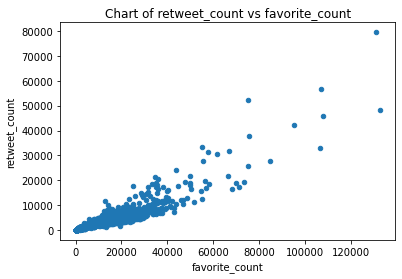

In [71]:
df_Dogmaster.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Chart of retweet_count vs favorite_count');

#### #2: A bar chart of the various dog stages identified after cleaning

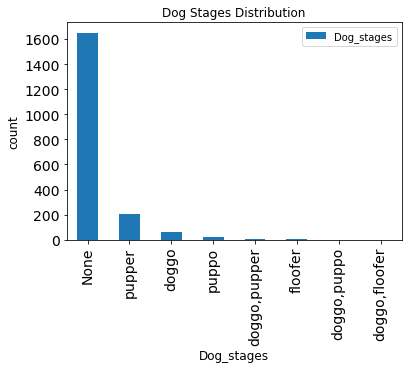

In [70]:
# A bar chart of the Dog_Stages will be plotted.
# This will show the count of the dog_stages combination in the dataset

df_Dogmaster['Dog_stages'].value_counts().plot(kind='bar', title='Dog Stages Distribution', fontsize=14)
plt.xlabel('Dog_stages', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend()